# 人口 分布

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = '../../../data/processed/df_filtered.xlsx'
df = pd.read_excel(filepath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   island_names              945 non-null    object 
 1   years                     945 non-null    int64  
 2   island_ids                945 non-null    int64  
 3   region_codes              945 non-null    object 
 4   region_names              945 non-null    object 
 5   prefecture_codes          945 non-null    int64  
 6   populations               795 non-null    float64
 7   treatment_group           945 non-null    int64  
 8   treatment_group_mainland  945 non-null    int64  
 9   year_bridges_opened       945 non-null    int64  
 10  after_treated             945 non-null    int64  
 11  year_connect_mainland     945 non-null    int64  
 12  after_treated_mainland    945 non-null    int64  
 13  income                    516 non-null    float64
 14  prefecture

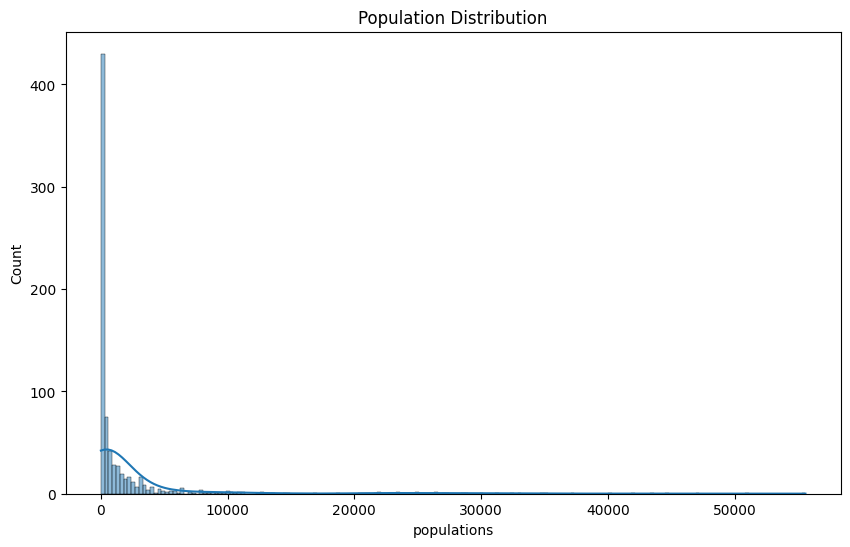

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['populations'], kde=True)
plt.title('Population Distribution')
plt.show()

## 推移

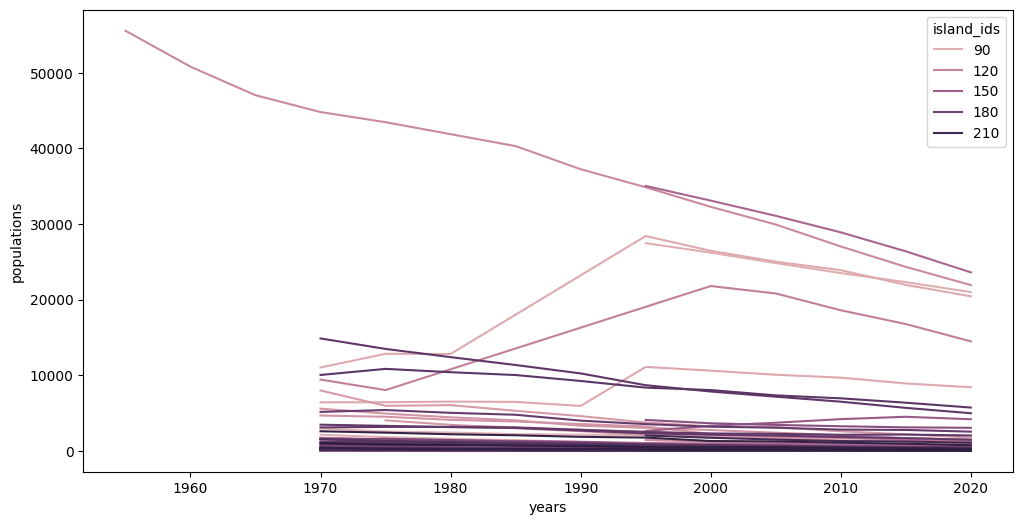

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='years', y='populations', hue='island_ids', data=df)
plt.show()

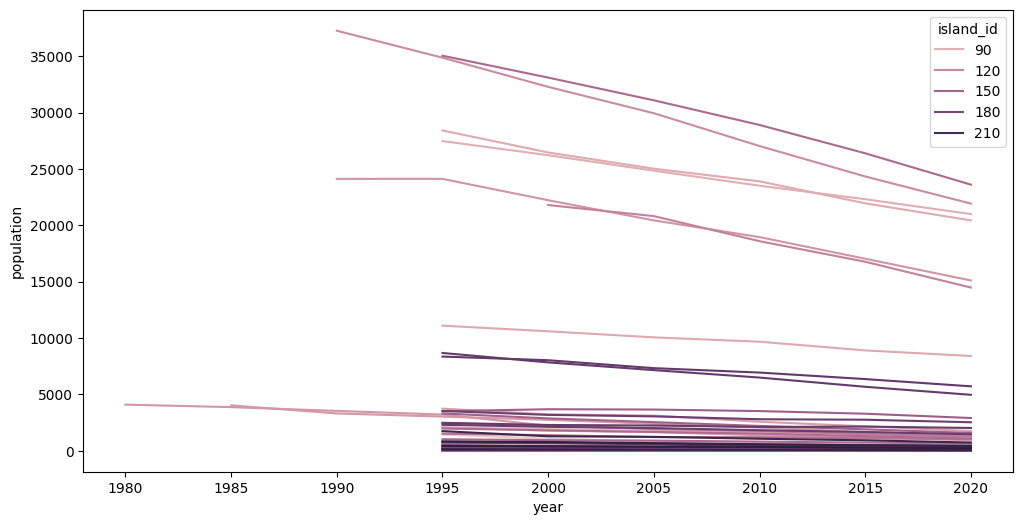

In [16]:
df_treatment = df[df['dummy_island_has_bridge'] == 1]
df_control = df[df['dummy_island_has_bridge'] == 0]
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='population', data=df_treatment, color='red', hue='island_id')
plt.show()

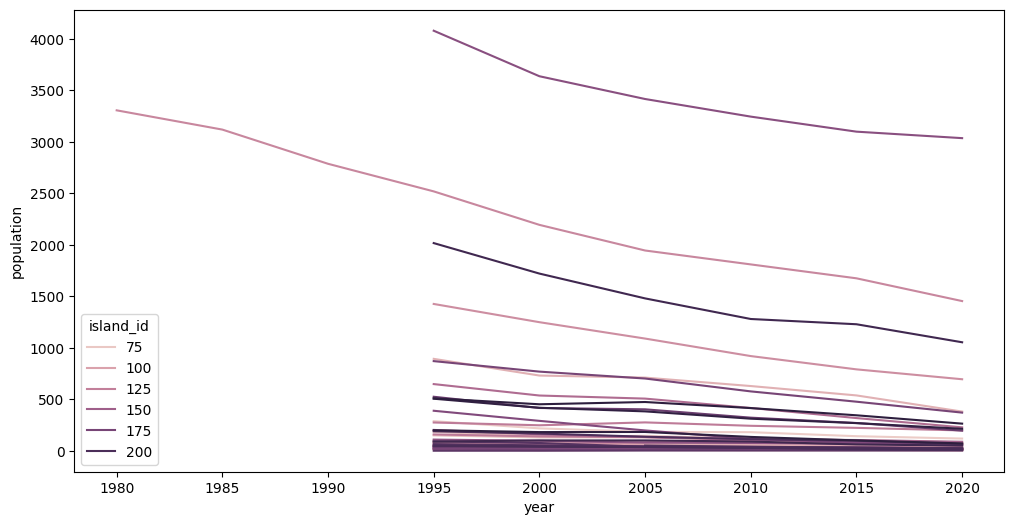

In [15]:
df_control = df[df['dummy_island_has_bridge'] == 0]
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='population', data=df_control, color='blue', hue='island_id')
plt.show()